In [1]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [22]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
df.shape

(5572, 5)

In [24]:
# Data cleaning
# EDA
# Test preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deployment

# Data Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [26]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [27]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [29]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [31]:
df['target'] = encoder.fit_transform(df['target'])

In [32]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [34]:
df.duplicated().sum()

403

In [36]:
df = df.drop_duplicates(keep='first')

In [38]:
df.shape

(5169, 2)

# EDA

In [39]:
df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [40]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1ece86d0750>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

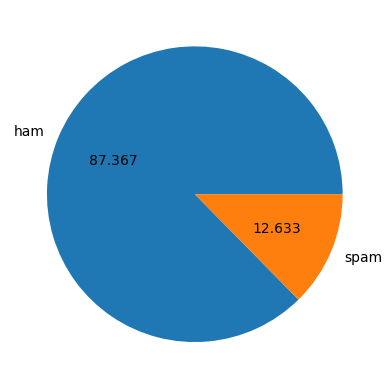

In [46]:
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.3f')

In [47]:
# clearly data imbalanced
import nltk

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Satheesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [52]:
df['num_characters'] =  df.text.apply(len)

In [53]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [57]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [61]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [63]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [64]:
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [65]:
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

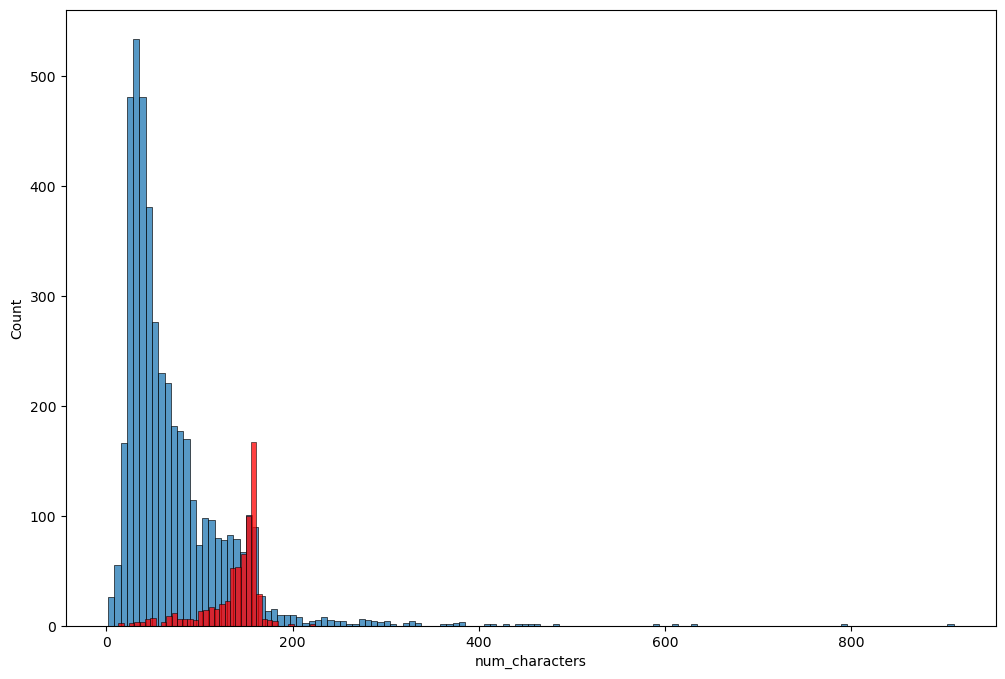

In [72]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


C:\Users\Satheesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


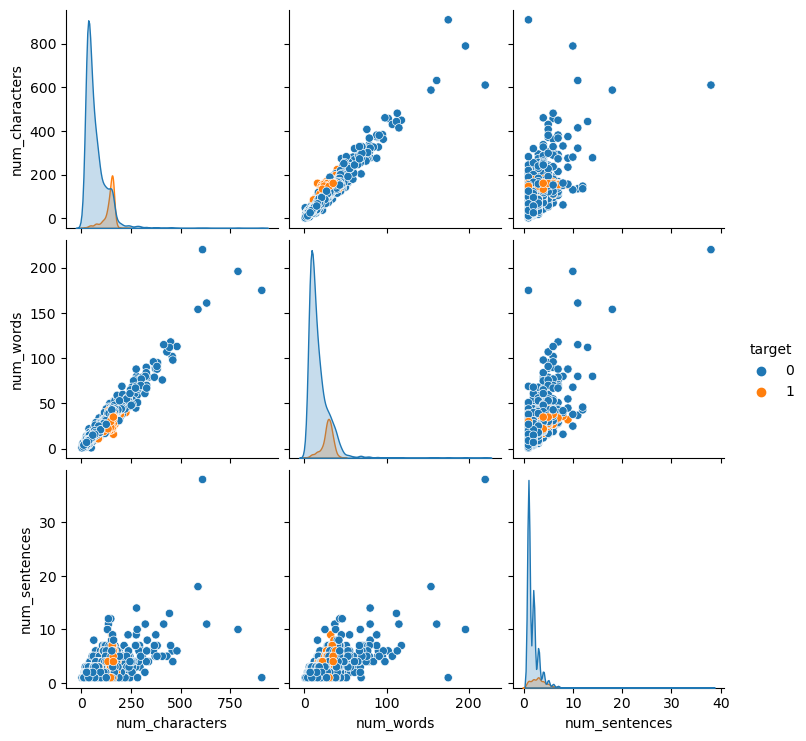

In [75]:
sns.pairplot(df,hue='target')

In [77]:
df.drop('text',axis=1).corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [ ]:
# Lower case
# Tokenizing
# Removing special characters
# Removing Stop words and punctuation
# stemming

In [119]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [122]:
def transform_text(text):
    text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [123]:
transform_text('Do you like my presentation on ML ?')

'do like present ml'

In [125]:
df['transformed_text'] = df['text'].apply(lambda x : transform_text(x))

In [126]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [127]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,background_color='white',min_font_size=10)

In [134]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

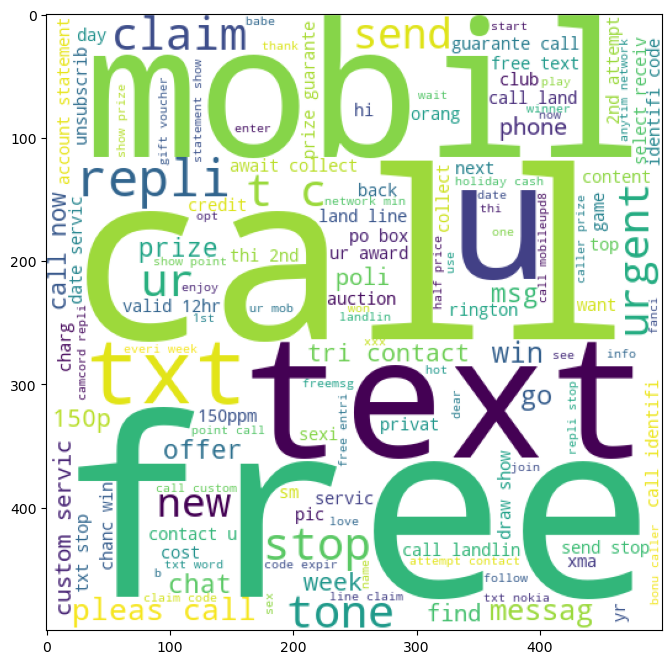

In [137]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)


In [138]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

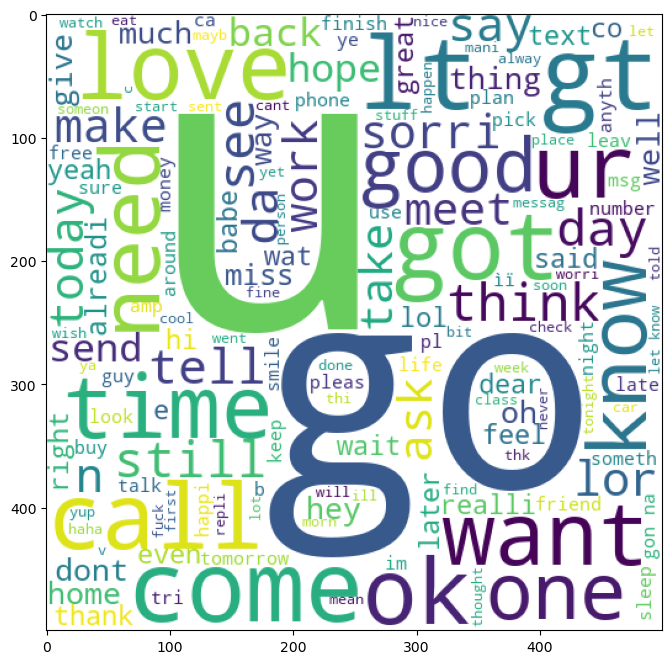

In [139]:
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)


In [156]:
spam_words = []
for sentence in df[df['target']==1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_words.append(word)

In [157]:
len(spam_words)

10847

In [167]:
from collections import Counter
top_30_spam = Counter(spam_words).most_common(30)

In [168]:
most_common_data_spam = pd.DataFrame(top_30_spam)

In [169]:
most_common_data_spam.head()

,0,1
0,call,320
1,free,191
2,2,157
3,txt,141
4,text,122


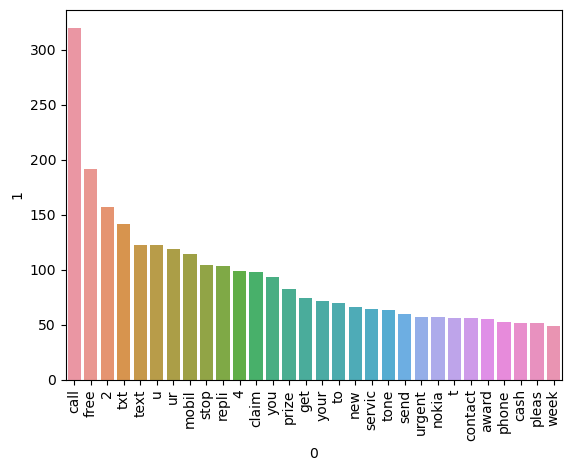

In [170]:
sns.barplot(x = most_common_data_spam[0],y = most_common_data_spam[1])
plt.xticks(rotation='vertical')
plt.show()

In [164]:
ham_words = []
for sentence in df[df['target']==0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_words.append(word)

In [165]:
len(ham_words)

40814

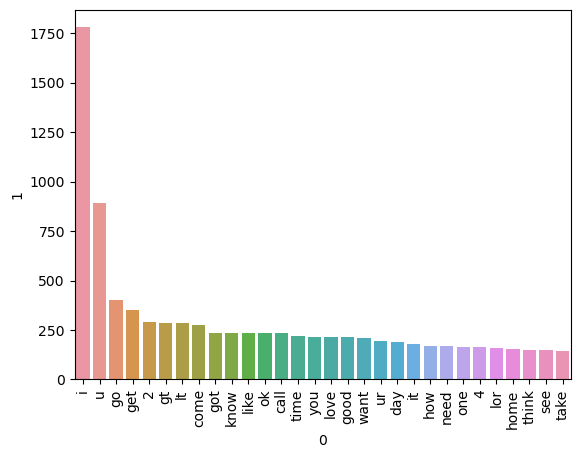

In [166]:
top_30_ham = Counter(ham_words).most_common(30)
most_common_data_ham = pd.DataFrame(top_30_ham)
sns.barplot(x = most_common_data_ham[0],y = most_common_data_ham[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [187]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [208]:
tfidf.idf_

array([8.45201568, 8.85748079, 8.85748079, ..., 8.85748079, 8.85748079,
       5.61880233])

In [209]:
X.shape

(5169, 6826)

In [188]:
y = df['target']

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [193]:
 from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [194]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [199]:
from sklearn.metrics import accuracy_score,precision_score

In [201]:
gnb.fit(X_train,y_train)
print(accuracy_score(y_test,gnb.predict(X_test)))
print(precision_score(y_test,gnb.predict(X_test)))

0.8704061895551257
0.5238095238095238


In [203]:
mnb.fit(X_train,y_train)
print(accuracy_score(y_test,mnb.predict(X_test)))
print(precision_score(y_test,mnb.predict(X_test)))

0.9622823984526112
0.9907407407407407


In [204]:
bnb.fit(X_train,y_train)
print(accuracy_score(y_test,bnb.predict(X_test)))
print(precision_score(y_test,bnb.predict(X_test)))

0.9690522243713733
0.9669421487603306


In [205]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))